In [2]:
import numpy as np # linear algebra
import colorsys
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


In [36]:
df = pd.read_csv('vgsales.csv')
df=df[df['Year'] <= 2016]
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Ave
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,8.274000
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,1.298065
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,4.477500
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,4.714286
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,1.568500


In [10]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

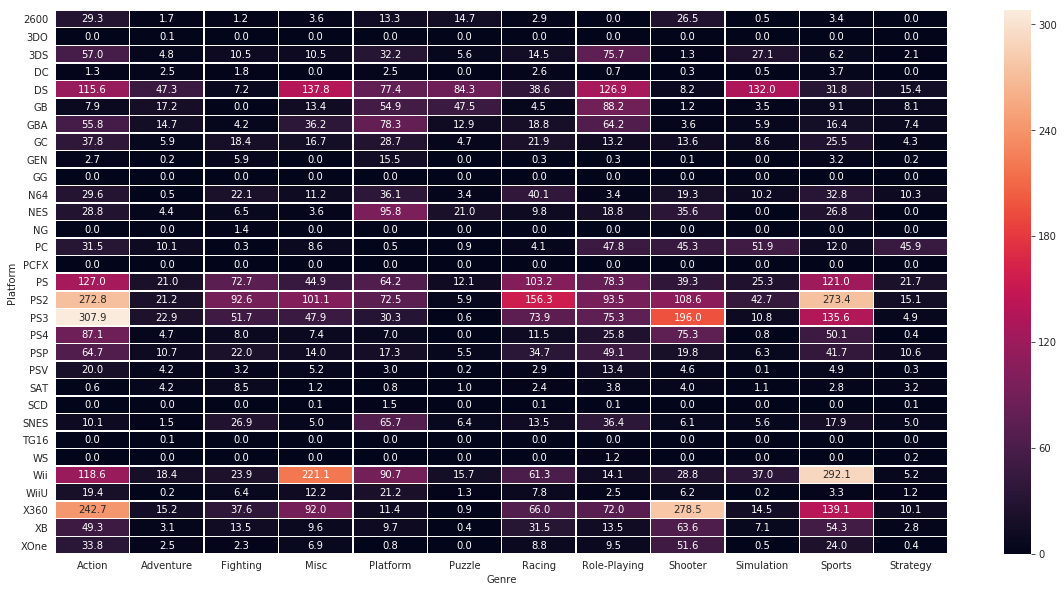

In [42]:
plt.figure(figsize=(20,10))
platform_genre_sales = df.pivot_table(
                        index='Platform', 
                        columns='Genre', 
                        values='Global_Sales', 
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(platform_genre_sales, annot=True, fmt=".1f", linewidths=.5)

Text(0.5,0,'year')

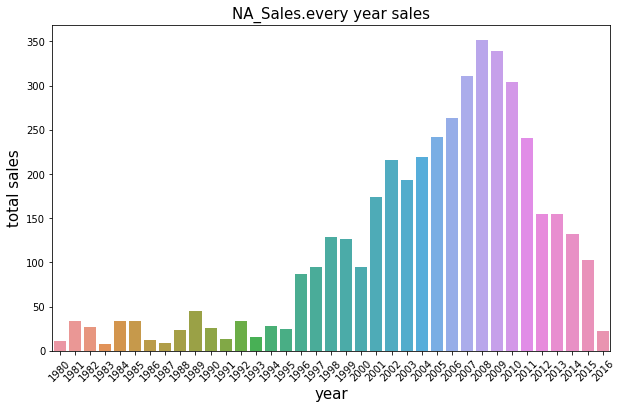

In [18]:
min_year = int(df['Year'].dropna().min())
max_year = int(df['Year'].dropna().max())
year_range = range(min_year,max_year+1)
year_saleNA = []
year_saleEU = []
year_saleJP = []
year_saleO = []

year_list = []
for year in year_range:
    year_saleNA.append(df[df['Year'] == year].dropna()['NA_Sales'].sum())
    year_saleEU.append(df[df['Year'] == year].dropna()['EU_Sales'].sum())
    year_saleJP.append(df[df['Year'] == year].dropna()['JP_Sales'].sum())
    year_saleO.append(df[df['Year'] == year].dropna()['Other_Sales'].sum())
    year_list.append(year)

fig,ax = plt.subplots(figsize=(10,6))
sns.barplot(x = year_list,y = year_saleNA,ax=ax)
plt.title('NA_Sales.every year sales',fontsize=15 )
ticks = plt.setp(ax.get_xticklabels(),fontsize=10,rotation=45)
plt.ylabel('total sales',fontsize=15)
plt.xlabel('year',fontsize=15)

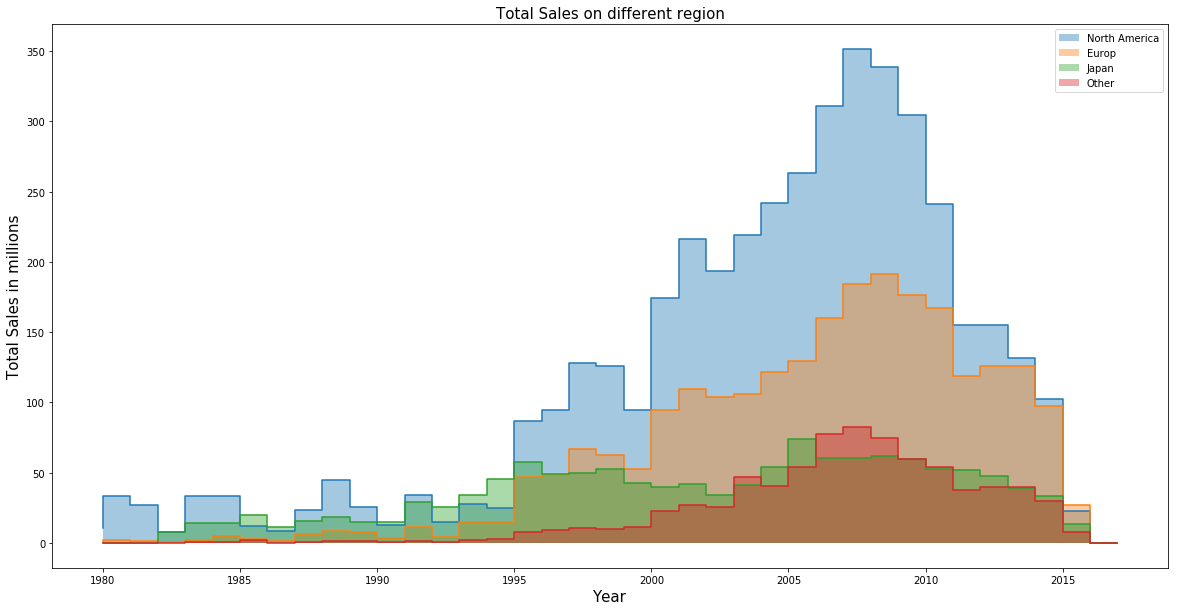

In [15]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import mpl_toolkits.mplot3d.art3d as art3d
from numpy import pi, arange, linspace, sin

x = year_list


plt.figure(figsize=(20,10))
plt.fill_between(x,year_saleNA,alpha=0.4,step="pre",label = "North America")
plt.fill_between(x,year_saleEU,alpha=0.4,step="pre",label = "Europ")
plt.fill_between(x,year_saleJP,alpha=0.4,step="pre",label = "Japan")
plt.fill_between(x,year_saleO,alpha=0.4,step="pre", label = "Other")
plt.plot(x,year_saleNA,drawstyle="steps")
plt.plot(x,year_saleEU,drawstyle="steps")
plt.plot(x,year_saleJP,drawstyle="steps")
plt.plot(x,year_saleO,drawstyle="steps")
plt.legend(loc='upper right')
plt.title('Total Sales on different region',fontsize=15 )
plt.ylabel('Total Sales in millions',fontsize=15)
plt.xlabel('Year',fontsize=15)
plt.show()




In [62]:

df1=df.rename(index=str, columns={"NA_Sales": "North America", "EU_Sales": "Europe",
                                  "JP_Sales": "Japan","Other_Sales": "Other"})
df1=df1.loc[:, 'Name': 'Global_Sales'].sort_values(by="Global_Sales", ascending=True).tail(10)

In [46]:
df1

,Name,Platform,Year,Genre,Publisher,North America,Europe,Japan,Other,Global_Sales
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
7,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74


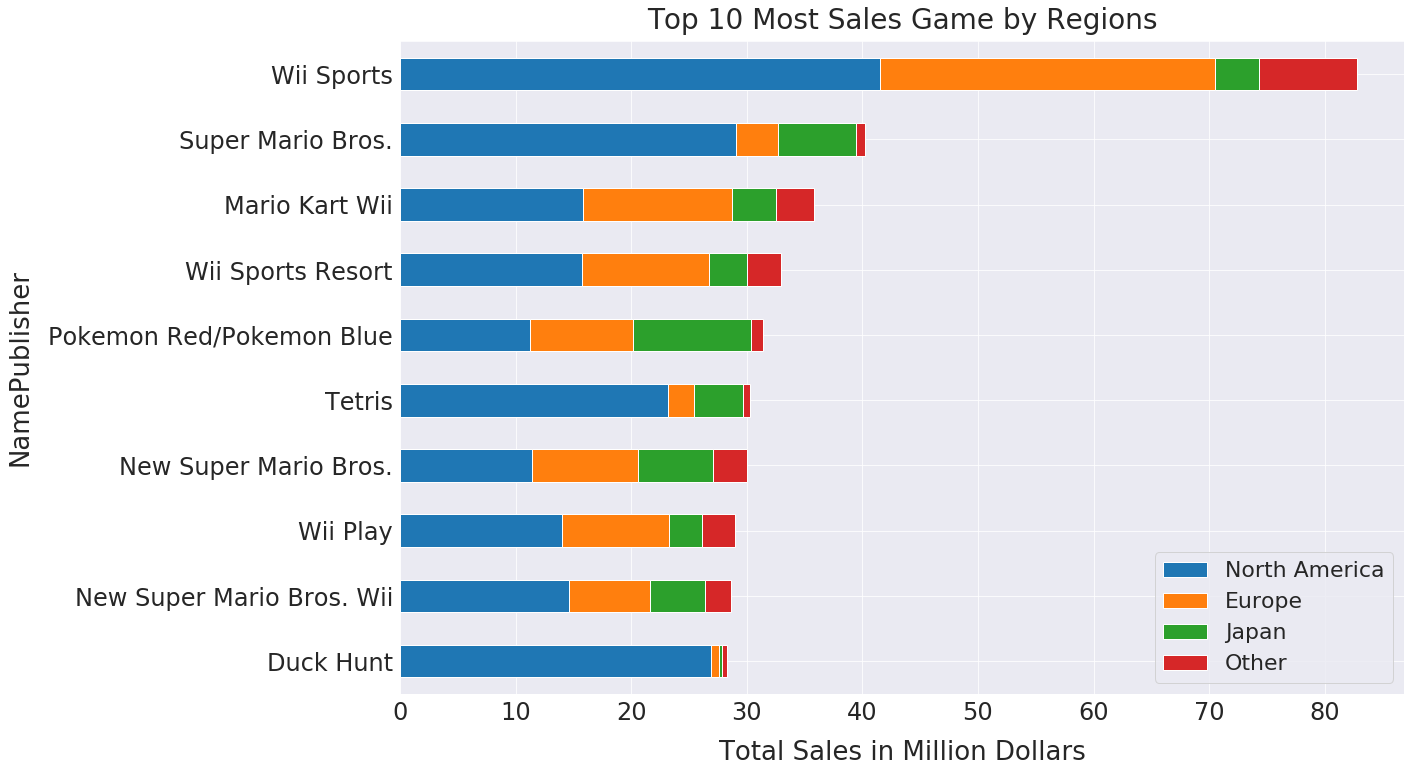

In [64]:
import matplotlib.ticker as tick
sns.set_style("darkgrid")
ax=df1.set_index('Name')[['North America', 'Europe', 'Japan', 'Other']].plot(kind='barh',
figsize=(18, 12), stacked=True)
plt.title("Top 10 Most Sales Game by Regions", fontsize=28, y=1.01)
plt.xlabel("Total Sales in Million Dollars", fontsize=26, labelpad=15)
plt.ylabel("Name"+"Publisher", fontsize=26, labelpad=15)
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
#ax = plt.gca()
plt.legend(fontsize=22);

In [42]:
dff = df[df['Global_Sales']>0.5]
dff['Ave'] = dff['Global_Sales']/(2016-dff['Year'])
# df2=dff.rename(index=str, columns={"NA_Sales": "North America", "EU_Sales": "Europe",
#                                   "JP_Sales": "Japan","Other_Sales": "Other"})
# df2=df2.loc[:, 'Name': 'Ave'].sort_values(by="Ave", ascending=True).tail(10)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [60]:
df2=df.rename(index=str, columns={"NA_Sales": "North America", "EU_Sales": "Europe",
                                  "JP_Sales": "Japan","Other_Sales": "Other"})
df2=df2.loc[:, 'Name': 'Global_Sales'].sort_values(by="Global_Sales", ascending=False).head(1000)
dff['Ave'] = dff['Global_Sales']/(2017-dff['Year'])
dff=dff.loc[:, 'Name': 'Ave'].sort_values(by="Ave", ascending=False).head(10)


In [61]:
import matplotlib.ticker as tick
sns.set_style("darkgrid")
ax=dff.set_index('Name')[['North America', 'Europe', 'Japan', 'Other']].plot(kind='barh',
figsize=(18, 12), stacked=True)
plt.title("Top 10 Average Most Sales Game by Regions", fontsize=28, y=1.01)
plt.xlabel("Average Total Sales in Million Dollars", fontsize=26, labelpad=15)
plt.ylabel("Name", fontsize=26, labelpad=15)
plt.yticks(fontsize=24)
plt.xticks(fontsize=24)
#ax = plt.gca()
plt.legend(fontsize=22);

KeyError: "['North America' 'Europe' 'Japan' 'Other'] not in index"

In [43]:
df["Platform" ] = df["Platform"].replace(
    ["GB", "NES", "DS", "X360", "SNES", "GBA", "3DS", "N64", "PS", "XB",
     "XOne", "PSV", "TG16", "3DO", "PCFX"],
    ["Game Boy", "Nintendo Entertainment System", "Nintendo DS", "Xbox 360",
     "Super Nintendo Entertainment System",
     "Nintendo Game Boy Advance", "Nintendo 3DS", "Nintendo 64","PlayStation",
     "Xbox","Xbox One", "PlayStation Vita", "TurboGrafx-16",
     "3DO Interactive Multiplayer", "NEC PC‑FX"])
PlayStation = ['PS3', 'PS4', 'PS2', 'PlayStation', 'PSP', 'PlayStation Vita']
Nintendo = ['Wii', 'Nintendo Entertainment System', 'Game Boy','Nintendo DS', 
            'Super Nintendo Entertainment System', 'Nintendo Game Boy Advance',
            'Nintendo 3DS', 'Nintendo 64','WiiU']
Microsoft = ['Xbox', 'Xbox One', 'Xbox 360']
Other = ['PC', '2600', 'GC', 'GEN', 'DC', 'SAT', 'SCD', 'WS', 'NG', 'TurboGrafx-16', 
         '3DO Interactive Multiplayer', 'GG', 'NEC PC‑FX']

In [44]:
def ProductFamily (c):
    if c['Platform'] in PlayStation:
        return 'PlayStation'
    elif c['Platform'] in Nintendo:
        return 'Nintendo'
    elif c['Platform'] in Microsoft:
        return 'Microsoft'
    elif c['Platform'] in Other:
        return 'Other'
    else:
        return 'o'

df['ProductFamily'] = df.apply(ProductFamily, axis=1)

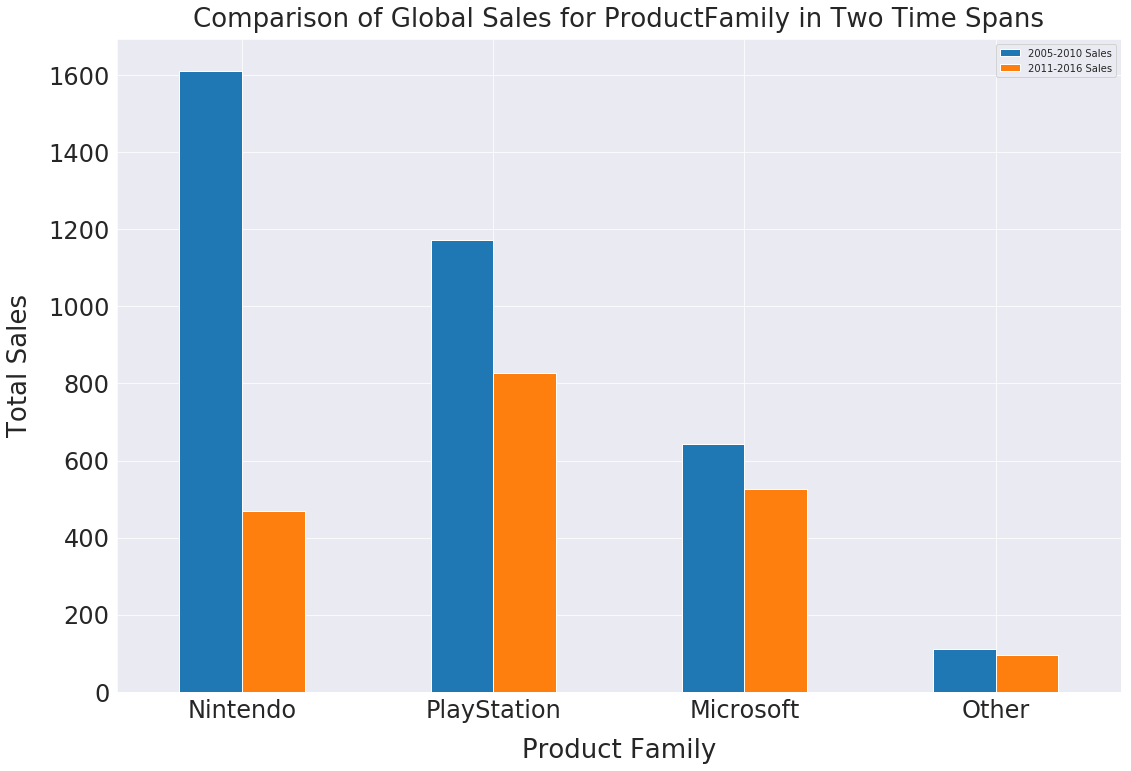

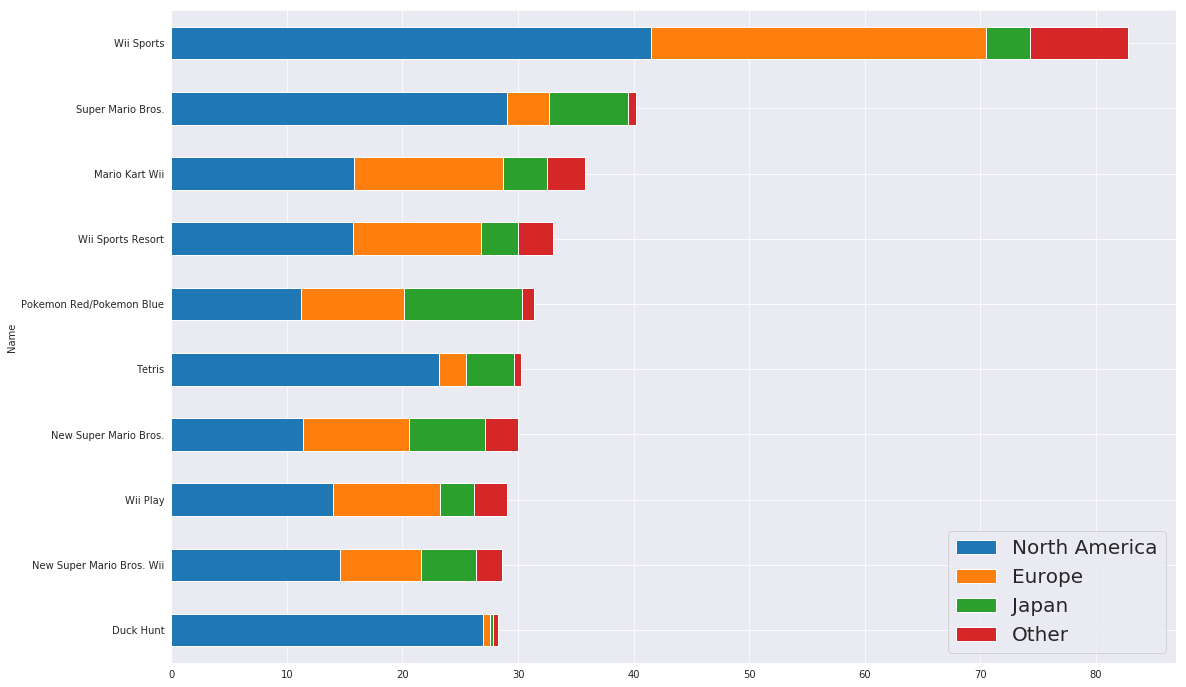

In [45]:
before2011=df[(df["Year"]>=2005) & (df["Year"]<2011)].groupby("ProductFamily")['Global_Sales'].sum().sort_values(ascending = False).reset_index()

after2011=df[(df["Year"]>=2011) & (df["Year"]<2017)].groupby("ProductFamily")['Global_Sales'].sum().sort_values(ascending = False).reset_index()

combined=pd.merge(before2011, after2011, on="ProductFamily")
combined=combined.rename(index=str, columns={"Global_Sales_x": "2005-2010 Sales", "Global_Sales_y": "2011-2016 Sales"})
sns.set_style("darkgrid")
combined.set_index('ProductFamily')[['2005-2010 Sales', '2011-2016 Sales']].plot(kind='bar', 
                                                                        figsize=(18, 12))
plt.xticks(rotation=0)
plt.title("Comparison of Global Sales for ProductFamily in Two Time Spans", fontsize=26, y=1.01)
plt.xlabel("Product Family", fontsize=26, labelpad=15)
plt.ylabel("Total Sales", fontsize=26, labelpad=15)
plt.yticks(fontsize = 24 )
plt.xticks(fontsize = 24 )
ax=df1.set_index('Name')[['North America', 'Europe', 'Japan', 'Other']].plot(kind='barh',
figsize=(18, 12), stacked=True)
#ax = plt.gca()
plt.legend(fontsize=20);